<a href="https://colab.research.google.com/github/RaweenS/DADS6003/blob/main/ML%20practice%201%20(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
import pickle

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
#No missing data
df[df.isnull().any(axis=1)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
df = df.replace({"Yes": 1, "No": 0,"yes":1,"no":0})
df["furnishingstatus"] = df["furnishingstatus"].replace({"furnished":2,"semi-furnished":1,"unfurnished":0})

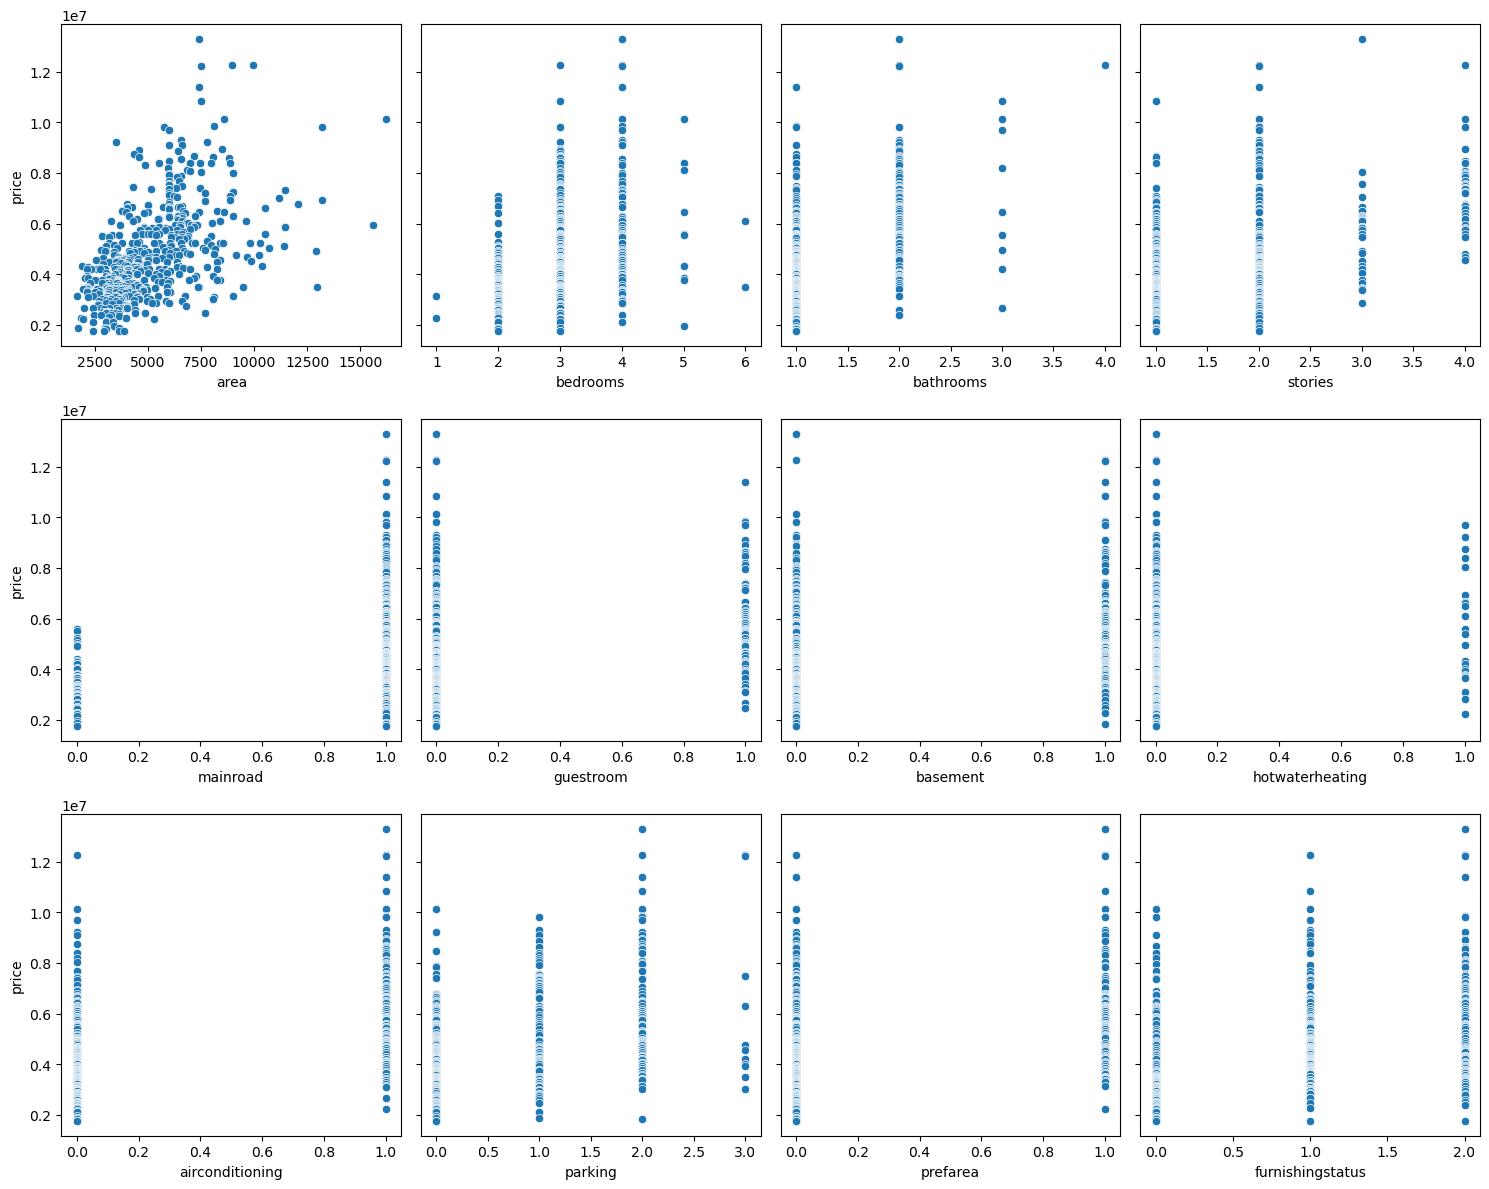

In [6]:
# Assuming 'df' is your DataFrame
features = df.columns[1:]
target_variable = df.columns[0]

# Calculate the number of features per row
features_per_row = 4

# Calculate the number of rows
num_rows = (len(features) + features_per_row - 1) // features_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, features_per_row, figsize=(15, 4*num_rows), sharey=True)

# Flatten the axes array if there is more than one row
axes = axes.flatten() if num_rows > 1 else [axes]

# Loop through the features and create pair plots
for i, feature in enumerate(features):
    row = i // features_per_row
    col = i % features_per_row
    sns.scatterplot(x=df[feature], y=df[target_variable], ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target_variable)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

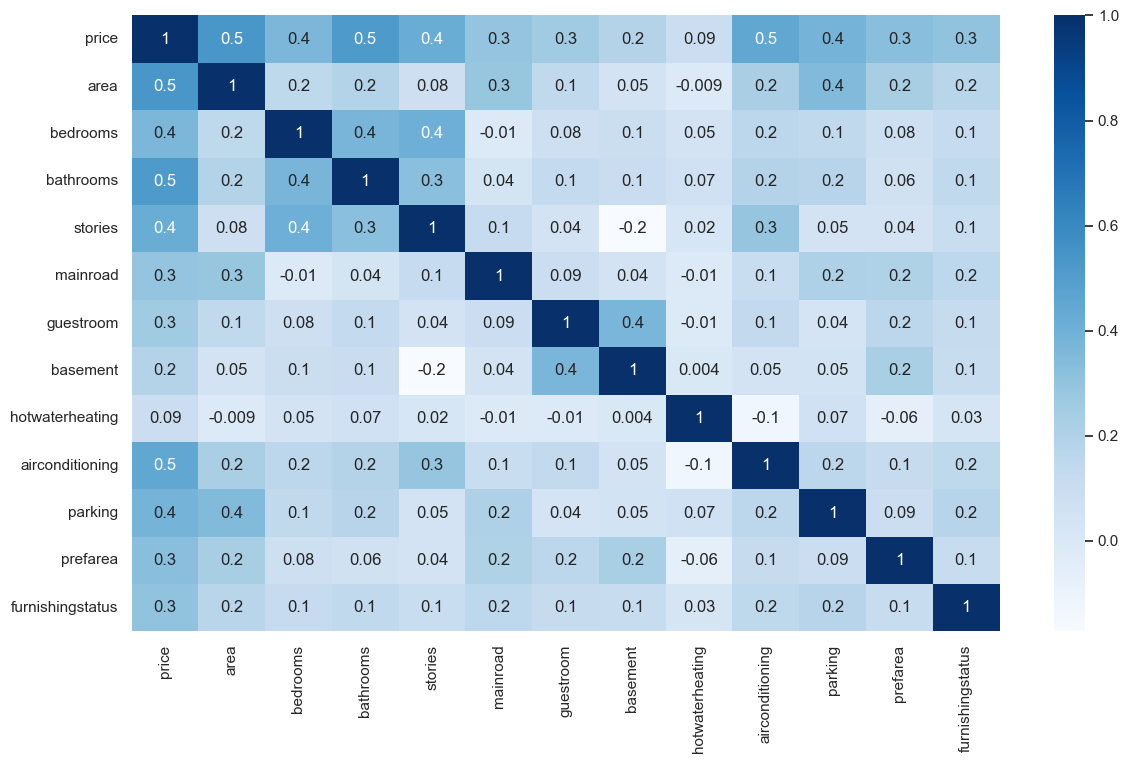

In [7]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

<b>Full Data<b>

In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=777)
linear_model = LinearRegression().fit(X_train,y_train)
print(linear_model.intercept_)
print(linear_model.coef_)
pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test,pred)
r2 = r2_score(y_test,pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'r2 score: {r2:.2f}')

-416958.2381670736
[2.53394778e+02 1.08657937e+05 9.96967577e+05 4.95025322e+05
 3.94680970e+05 1.84080110e+05 5.46224693e+05 8.03190773e+05
 8.24296750e+05 2.94874047e+05 5.73898242e+05 2.24455087e+05]
Mean Squared Error: 915131411448.47
r2 score: 0.67


<B> Trial by remove some elements with correlation with price <B>

In [9]:
for i in np.linspace(0.1,1,10):
    try:
        print(f'Correlation Criteria {i} \n')
        corel = corr[corr["price"]>i][1:].index
        print(corel)
        Xc = df.loc[:,corel]
        yc = df.iloc[:,0]
        Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,yc, test_size=0.2, random_state=777)
        linear_modelc = LinearRegression().fit(Xc_train,yc_train)
        #print(linear_modelc.intercept_)
        #print(linear_modelc.coef_)
        pred = linear_modelc.predict(Xc_test)
        msec = mean_squared_error(yc_test,pred)
        r2c = r2_score(yc_test,pred)

        print(f'Mean Squared Error: {msec:.2f}')
        print(f'r2 score: {r2c:.2f}')
    except: 
        pass

Correlation Criteria 0.1 

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')
Mean Squared Error: 959210578943.65
r2 score: 0.66
Correlation Criteria 0.2 

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'airconditioning', 'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Mean Squared Error: 854905538958.78
r2 score: 0.70
Correlation Criteria 0.30000000000000004 

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Mean Squared Error: 910621953758.31
r2 score: 0.68
Correlation Criteria 0.4 

Index(['area', 'bathrooms', 'stories', 'airconditioning'], dtype='object')
Mean Squared Error: 1089379331264.68
r2 score: 0.61
Correlation Criteria 0.5 

Index(['area', 'bathrooms'], dtype='object')
Mean Squared Error: 148535

In [10]:
corel = corr[corr["price"]>0.2][1:].index
print(corel)
Xc = df.loc[:,corel]
yc = df.iloc[:,0]
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,yc, test_size=0.2, random_state=777)
linear_modelc = LinearRegression().fit(Xc_train,yc_train)
#print(linear_modelc.intercept_)
#print(linear_modelc.coef_)
pred = linear_modelc.predict(Xc_test)
msec = mean_squared_error(yc_test,pred)
r2c = r2_score(yc_test,pred)

print(f'Mean Squared Error: {msec:.2f}')
print(f'r2 score: {r2c:.2f}')

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'airconditioning', 'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Mean Squared Error: 854905538958.78
r2 score: 0.70


<b> Trial by Scaling <b>

In [11]:
scaler = StandardScaler()
scaler.fit(X) #calculate mu, sd
Xs = scaler.transform(X)

mscaler = MinMaxScaler()
mscaler.fit_transform(X) #calculate mu, sd
Xmm = mscaler.transform(X)

In [12]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs,y, test_size=0.2, random_state=777)
linear_models = LinearRegression().fit(Xs_train,ys_train)
print(linear_models.intercept_)
print(linear_models.coef_)
preds = linear_models.predict(Xs_test)
mses = mean_squared_error(ys_test,preds)
r2s = r2_score(ys_test,preds)

print(f'Mean Squared Error: {mses:.2f}')
print(f'r2 score: {r2s:.2f}')

4794666.061351667
[549397.67325627  80122.88787724 500486.12099937 429036.5814021
 137473.17827147  70410.14490252 260611.23952037 168032.73047302
 383094.33052205 253826.08785995 243282.79928055 170737.11358056]
Mean Squared Error: 915131411448.47
r2 score: 0.67


In [13]:
Xmm_train, Xmm_test, ymm_train, ymm_test = train_test_split(Xmm,y, test_size=0.2, random_state=777)
linear_modelmm = LinearRegression().fit(Xmm_train,ymm_train)
print(linear_modelmm.intercept_)
print(linear_modelmm.coef_)
predmm = linear_modelmm.predict(Xmm_test)
msemm = mean_squared_error(ymm_test,preds)
r2mm = r2_score(ymm_test,predmm)

print(f'Mean Squared Error: {msemm:.2f}')
print(f'r2 score: {r2mm:.2f}')

1601793.9805613803
[3686894.01909155  543289.6847416  2990902.72972846 1485075.96478691
  394680.96963151  184080.11044582  546224.69327113  803190.77303244
  824296.75041961  884622.13997607  573898.24180681  448910.17413162]
Mean Squared Error: 915131411448.47
r2 score: 0.67


<b> Trial by Polynomial <b>

In [14]:
for i in range (1,9):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X)
    Xpl_train, Xpl_test, ypl_train, ypl_test = train_test_split(X_poly,y, test_size=0.2, random_state=777)
    linear_modelpl = LinearRegression().fit(Xpl_train, ypl_train)
    #print(linear_modelpl.intercept_)
    #print(linear_modelpl.coef_)
    predpl = linear_modelpl.predict(Xpl_test)
    msepl = mean_squared_error(ypl_test,predpl)
    r2pl = r2_score(ypl_test,predpl)

    print(f'Degree {i}')
    print(f'Mean Squared Error: {msepl:.2f}')
    print(f'r2 score: {r2pl:.2f}')

Degree 1
Mean Squared Error: 915131411448.47
r2 score: 0.67
Degree 2
Mean Squared Error: 953134347825.67
r2 score: 0.66
Degree 3
Mean Squared Error: 25306567075030.48
r2 score: -7.99
Degree 4
Mean Squared Error: 26509338446762.80
r2 score: -8.42
Degree 5
Mean Squared Error: 97482604456663.66
r2 score: -33.64
Degree 6
Mean Squared Error: 401595658106489.00
r2 score: -141.69
Degree 7
Mean Squared Error: 928051070652191.12
r2 score: -328.74
Degree 8
Mean Squared Error: 9617303747320168.00
r2 score: -3416.07


<B> Normal Multi-regression with full data yield R2 at around 67% and after some trial and error to improve accuracy by various methods Remove some features, Feature scaling using Z-score and min-max, Polynomial Regression. \
    The best result seem to be by remove features, removed elements with correlation less than 0.2 seem to yield the best result at R2 0.7<B>

In [15]:
pickle.dump(linear_modelc, open('ml_6610422008.sav','wb') )